In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('Mall_Customers.csv')

In [6]:
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


### Task: Cluster the  clients in two different groups based on Annual Income and Spending Score.

In [22]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [23]:
from sklearn.cluster import KMeans

Use the elbow method to define K

In [24]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

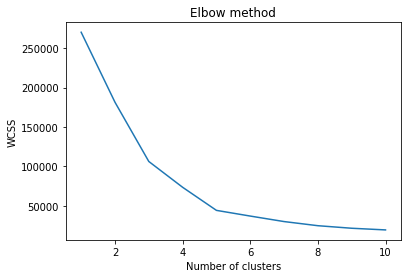

In [25]:
plt.plot(range(1, 11), wcss)
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
# Apply algorithm to X with 5 clusters
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10)
y_pred = kmeans.fit_predict(X)

In [27]:
y_pred

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3, 0, 4,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 3, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1], dtype=int32)

In [30]:
kmeans.cluster_centers_

array([[ 26.30434783,  20.91304348],
       [ 86.53846154,  82.12820513],
       [ 88.2       ,  17.11428571],
       [ 55.2962963 ,  49.51851852],
       [ 25.72727273,  79.36363636]])

Vizualisation results

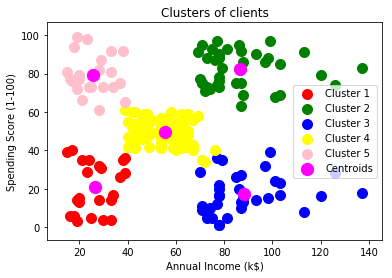

In [32]:
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], s=100, c='green', label='Cluster 2')
plt.scatter(X[y_pred == 2, 0], X[y_pred == 2, 1], s=100, c='blue', label='Cluster 3')
plt.scatter(X[y_pred == 3, 0], X[y_pred == 3, 1], s=100, c='yellow', label='Cluster 4')
plt.scatter(X[y_pred == 4, 0], X[y_pred == 4, 1], s=100, c='pink', label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='magenta', label='Centroids')
plt.title('Clusters of clients')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()